In [100]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import datetime as dt

In [101]:
data = pd.read_csv('C:/Users/Toshiba/Documents/GitHub/MIE_2.02_GeoInfo_WS2020/data/generated/DWD/hourly/precipitation/historical/prec_ts_appended_4.csv',sep=";")

In [102]:
data.tail()

,mess_datum,station_id,r1,longitude,latitude
244838,2017-08-16 20:00:00,15000,0.0,6.0244,50.7983
244839,2017-08-16 21:00:00,15000,0.0,6.0244,50.7983
244840,2017-08-16 22:00:00,15000,0.0,6.0244,50.7983
244841,2017-08-16 23:00:00,15000,0.0,6.0244,50.7983
244842,2017-08-17 00:00:00,15000,0.0,6.0244,50.7983


In [103]:
data['day1'] = pd.to_datetime(data['mess_datum'])

In [104]:
day = data['day1'].dt.date

In [105]:
data.tail()

,mess_datum,station_id,r1,longitude,latitude,day1
244838,2017-08-16 20:00:00,15000,0.0,6.0244,50.7983,2017-08-16 20:00:00
244839,2017-08-16 21:00:00,15000,0.0,6.0244,50.7983,2017-08-16 21:00:00
244840,2017-08-16 22:00:00,15000,0.0,6.0244,50.7983,2017-08-16 22:00:00
244841,2017-08-16 23:00:00,15000,0.0,6.0244,50.7983,2017-08-16 23:00:00
244842,2017-08-17 00:00:00,15000,0.0,6.0244,50.7983,2017-08-17 00:00:00


In [106]:
data['mess_datum']=pd.to_datetime(data.mess_datum, format='%Y/%m/%d %H:%M:%S')

In [107]:
data.insert(loc=6, column='day', value=(data.mess_datum.dt.date))

In [108]:
data.head()

,mess_datum,station_id,r1,longitude,latitude,day1,day
0,2017-04-16 00:00:00,216,0.0,7.8807,51.1143,2017-04-16 00:00:00,2017-04-16
1,2017-04-16 01:00:00,216,0.1,7.8807,51.1143,2017-04-16 01:00:00,2017-04-16
2,2017-04-16 02:00:00,216,0.1,7.8807,51.1143,2017-04-16 02:00:00,2017-04-16
3,2017-04-16 03:00:00,216,0.0,7.8807,51.1143,2017-04-16 03:00:00,2017-04-16
4,2017-04-16 04:00:00,216,0.0,7.8807,51.1143,2017-04-16 04:00:00,2017-04-16


In [109]:
del data['day1'] 

In [110]:
data = data.groupby(['day','station_id'])['r1'].sum().to_frame(name = 'daily_prep').reset_index()

In [111]:
data.tail()

,day,station_id,daily_prep
10285,2017-08-17,13671,0.0
10286,2017-08-17,13696,0.0
10287,2017-08-17,13700,0.0
10288,2017-08-17,13713,0.0
10289,2017-08-17,15000,0.0


In [112]:
data['station_id'] = data['station_id'].astype(int)
type(data['station_id'])

pandas.core.series.Series

In [113]:
#dividing dataframe according to station IDs

Olpe = data[data['station_id'].isin([216,2947,5468])]#216, 2947,5468
HSK = data[data['station_id'].isin([1300,2483,3215,4488,6264,7330])] #1300,2483,3215,4488,6264,7330
Siegen_WTGstein = data[data['station_id'].isin([796,389,390,4692])] #796,389,390,4692
Oberbergisher_Kreis = data[data['station_id'].isin([4127,5619])] #4127,5619
Markisher_Kreis = data[data['station_id'].isin([3098,3499,13713])] #3098,3499,13713
Ennepe_Ruhr_Kreis = data[data['station_id'].isin([6313,13700])] #6313,13700
Unna = data[data['station_id'].isin([6276])] #6276
Soest = data[data['station_id'].isin([3031,4313,4400,5360,5480])] #3031,4313,4400,5360,5480
Paderborn = data[data['station_id'].isin([934,3028,4368,5699])] #934,3028,4368,5699
Hoexter = data[data['station_id'].isin([613,644,5347])] #613,644,5347

In [114]:
Olpe

,day,station_id,daily_prep
0,2017-04-16,216,4.3
33,2017-04-16,2947,4.7
83,2017-04-17,216,14.6
116,2017-04-17,2947,12.0
166,2017-04-18,216,2.6
...,...,...,...
10074,2017-08-15,2947,0.3
10124,2017-08-16,216,11.7
10157,2017-08-16,2947,7.1
10207,2017-08-17,216,0.0


In [115]:
#calculating average daily precipitation for each County separately

Olpe = Olpe.groupby(['day'])['daily_prep'].mean().to_frame(name = 'avg_daily_prep').reset_index()
HSK = HSK.groupby(['day'])['daily_prep'].mean().to_frame(name = 'avg_daily_prep').reset_index()
Siegen_WTGstein = Siegen_WTGstein.groupby(['day'])['daily_prep'].mean().to_frame(name = 'avg_daily_prep').reset_index()
Oberbergisher_Kreis = Oberbergisher_Kreis.groupby(['day'])['daily_prep'].mean().to_frame(name = 'avg_daily_prep').reset_index()
Markisher_Kreis = Markisher_Kreis.groupby(['day'])['daily_prep'].mean().to_frame(name = 'avg_daily_prep').reset_index()
Ennepe_Ruhr_Kreis = Ennepe_Ruhr_Kreis.groupby(['day'])['daily_prep'].mean().to_frame(name = 'avg_daily_prep').reset_index()
Unna = Unna.groupby(['day'])['daily_prep'].mean().to_frame(name = 'avg_daily_prep').reset_index()
Soest = Soest.groupby(['day'])['daily_prep'].mean().to_frame(name = 'avg_daily_prep').reset_index()
Paderborn = Paderborn.groupby(['day'])['daily_prep'].mean().to_frame(name = 'avg_daily_prep').reset_index()
Hoexter = Hoexter.groupby(['day'])['daily_prep'].mean().to_frame(name = 'avg_daily_prep').reset_index() 

In [121]:
#cumulating average daily precipitation values for each County separately

Olpe.insert(loc=2, column='Olpe', value=(np.cumsum(Olpe['avg_daily_prep'])))
HSK.insert(loc=2, column='HSK', value=(np.cumsum(HSK['avg_daily_prep'])))
Siegen_WTGstein.insert(loc=2, column='Siegen_WTG', value=(np.cumsum(Siegen_WTGstein['avg_daily_prep'])))
Oberbergisher_Kreis.insert(loc=2, column='Oberbergisher_Kreis', value=(np.cumsum(Oberbergisher_Kreis['avg_daily_prep'])))
Markisher_Kreis.insert(loc=2, column='Maerkisher_Kreis', value=(np.cumsum(Markisher_Kreis['avg_daily_prep'])))
Ennepe_Ruhr_Kreis.insert(loc=2, column='Ennepe_Ruhr_Kreis', value=(np.cumsum(Ennepe_Ruhr_Kreis['avg_daily_prep'])))
Unna.insert(loc=2, column='Unna', value=(np.cumsum(Unna['avg_daily_prep'])))
Soest.insert(loc=2, column='Soest', value=(np.cumsum(Soest['avg_daily_prep'])))
Paderborn.insert(loc=2, column='Paderborn', value=(np.cumsum(Paderborn['avg_daily_prep'])))
Hoexter.insert(loc=2, column='Hoexter', value=(np.cumsum(Hoexter['avg_daily_prep'])))

In [122]:
Soest.tail()

,day,avg_daily_prep,Soest,Soest_cumulative_prec
119,2017-08-13,0.12,369.08,369.08
120,2017-08-14,0.02,369.10,369.10
121,2017-08-15,0.06,369.16,369.16
122,2017-08-16,0.66,369.82,369.82
123,2017-08-17,0.00,369.82,369.82


### Plotting Cumulative precipitation

##### Plotting cumulative precipitation of the 10 Counties separately in one diagram  

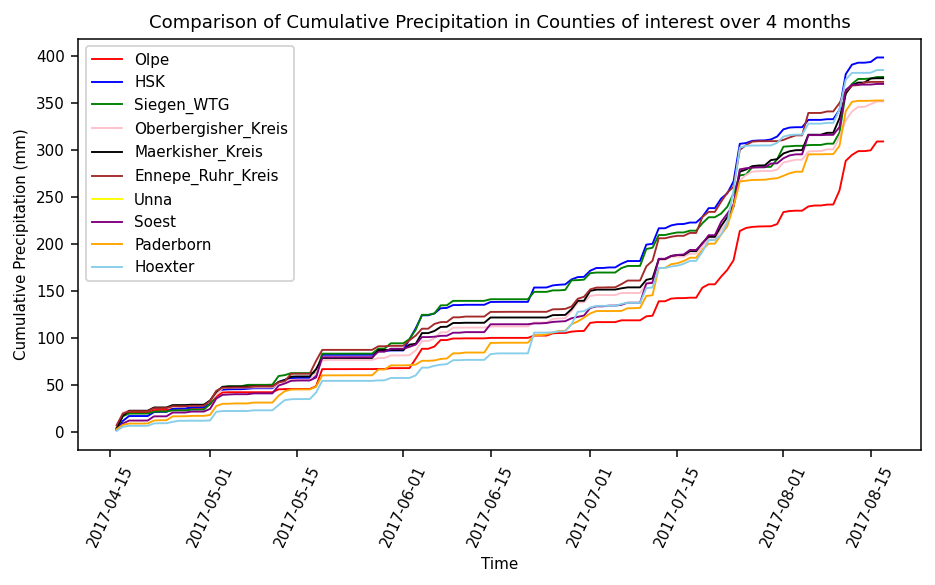

In [124]:
fig = plt.figure(dpi= 136, figsize=(8,4))
plt.rcParams.update({'font.size': 8})

plt.plot('day','Olpe',  data=Olpe, marker='', markerfacecolor='red',  color='red', linewidth=1)
plt.plot('day','HSK',  data=HSK, marker='', markerfacecolor='blue',  color='blue', linewidth=1)
plt.plot('day','Siegen_WTG',  data=Siegen_WTGstein, marker='', markerfacecolor='green',  color='green', linewidth=1)
plt.plot('day','Oberbergisher_Kreis',  data=Oberbergisher_Kreis, marker='', markerfacecolor='pink',  color='pink', linewidth=1)
plt.plot('day','Maerkisher_Kreis',  data=Markisher_Kreis, marker='', markerfacecolor='black',  color='black', linewidth=1)
plt.plot('day','Ennepe_Ruhr_Kreis',  data=Ennepe_Ruhr_Kreis, marker='', markerfacecolor='brown',  color='brown', linewidth=1)
plt.plot('day','Unna',  data=Unna, marker='', markerfacecolor='yellow',  color='yellow', linewidth=1)
plt.plot('day','Soest',  data=Soest, marker='', markerfacecolor='purple',  color='purple', linewidth=1)
plt.plot('day','Paderborn',  data=Paderborn, marker='', markerfacecolor='orange',  color='orange', linewidth=1)
plt.plot('day','Hoexter',  data=Hoexter, marker='', markerfacecolor='skyblue',  color='skyblue', linewidth=1)

plt.legend()

plt.xlabel('Time')
plt.ylabel('Cumulative Precipitation (mm)')
plt.title('Comparison of Cumulative Precipitation in Counties of interest over 4 months')
plt.xticks(rotation=65)
plt.savefig('C:/Users/Toshiba/Desktop/Master courses/Geoinformatics/Exercises/Exam files/cumulative_prec_10_counties')

plt.show()